In [1]:
####################################################################
###    This is the PYTHON version of program 8.2 from page 296 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR epidemic (with equal births and deaths) and      #
### random vaccination. Vaccination starts at time tV, after which #
### susceptible individuals are vaccinated at rate v               #
####################################################################


In [2]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

*v is the rate of random vaccination.

*beta is the transmission rate and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.

*nu is the over-all birth set. We set ν=μ to keep the population size constant.

*mu is the per captia death rate.

*tV	is the time at which the vaccination program is begun.

*S0 is the initial proportion of the population that are susceptible.

*I0 is the initial proportion of the population that are infectious.

In [3]:
beta=520/365.0;
gamma=1/7.0;
mu=1/(10*365.0);
S0=0.1;
I0=2e-3;
v0=0.002;
tV=5*365;
ND=MaxTime=20*365;
TS=1.0
R0=1-S0-I0

INPUT = np.hstack((S0,I0,R0))

In [4]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP   
	Y[0]= mu - beta*V[0]*V[1] - mu*V[0] - v * V[0]
	Y[1]= beta*V[0]*V[1] - gamma*V[1] - mu*V[1]
	Y[2]= v * V[0] + gamma*V[1] - mu*V[2]
	return Y   # For odeint

In [5]:
t_start = 0.0; t_end = tV; t_inc = TS
t_range1 = np.arange(t_start, t_end+t_inc, t_inc)
t_start = tV; t_end = ND; t_inc = TS
t_range2 = np.arange(tV, t_end+t_inc, t_inc)
T = np.hstack((t_range1, t_range2))
v=0
RES1 = spi.odeint(diff_eqs,INPUT,t_range1)
v=v0
RES2 = spi.odeint(diff_eqs,RES1[-1],t_range2)
print(RES2)

[[1.00427638e-01 1.70076755e-03 8.97871594e-01]
 [1.00230410e-01 1.70042162e-03 8.98069168e-01]
 [1.00034164e-01 1.69961080e-03 8.98266226e-01]
 ...
 [1.00473344e-01 3.18170264e-04 8.99208485e-01]
 [1.00473300e-01 3.18173113e-04 8.99208527e-01]
 [1.00473256e-01 3.18175942e-04 8.99208568e-01]]


In [6]:
S = np.hstack((RES1[:,0],RES2[:,0]))
I = np.hstack((RES1[:,1],RES2[:,1]))
R = np.hstack((RES1[:,2],RES2[:,2]))

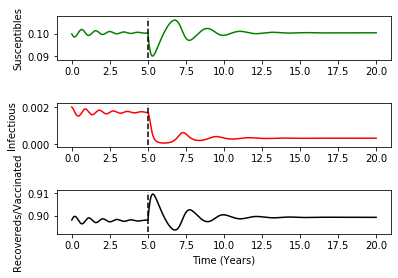

In [7]:
pl.subplot(311)
pl.plot(T[1:,]/365.0, S[1:,], '-g')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.subplots_adjust(hspace=1)
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(T[1:,]/365.0, I[1:,], '-r')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Infectious')
pl.subplot(313)
pl.plot(T[1:,]/365.0, R[1:,], '-k')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Recovereds/Vaccinated')
pl.xlabel('Time (Years)')

pl.show()